In [1383]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullahcetin/mirichoi0218insurance")

print("Path to dataset files:", path)

Path to dataset files: /home/jordi/.cache/kagglehub/datasets/abdullahcetin/mirichoi0218insurance/versions/1


In [1384]:
import pandas as pd

df = pd.read_csv(path + "/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1386]:
df.shape # Filas por columnas del df

(1338, 7)

<Axes: >

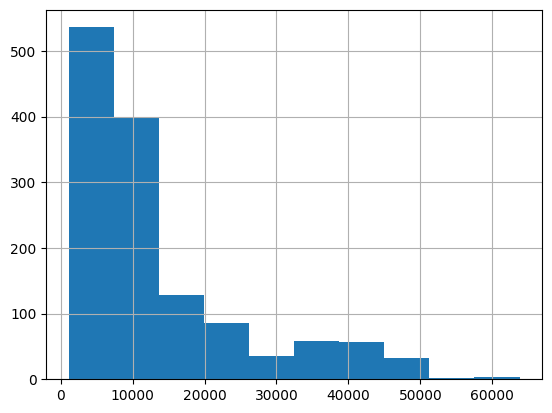

In [1387]:
# Análisis variable objetivo
df.charges.hist()

In [1388]:
df[df.charges > 50000].shape


(7, 7)

In [1389]:
df = df[df.charges < 50000]
df.shape

(1331, 7)

<Axes: >

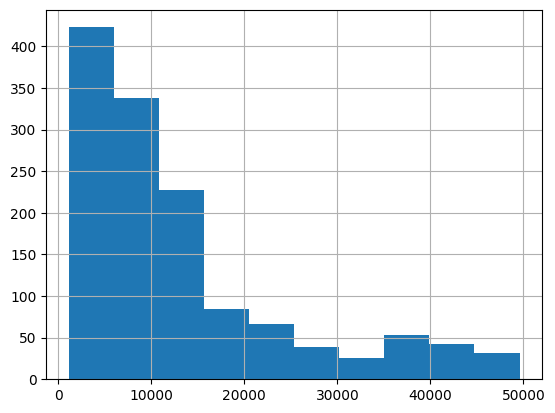

In [1390]:
df.charges.hist()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

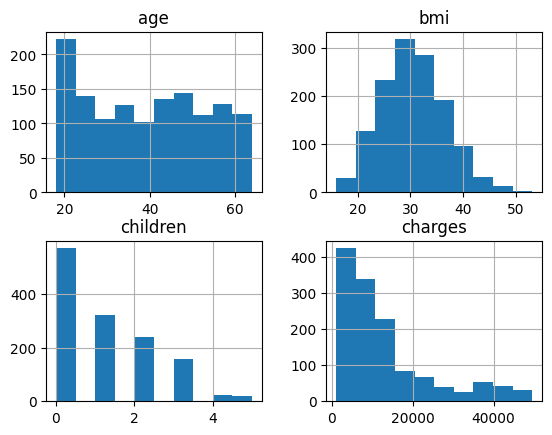

In [1391]:
# Histogramas de distribución
df.hist()

In [1392]:
# One-hot encoding para sexo
dummies_sex = pd.get_dummies(df.sex, dtype=int, drop_first=True)
dummies_sex

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [1393]:
df = df.join(dummies_sex)

In [1394]:
# One-hot encoding para region
dummies_region = pd.get_dummies(df.region, dtype=int,  drop_first=True)
dummies_region

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [1395]:
df = df.join(dummies_region)

In [1396]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [1397]:
df['smoker'] 

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1331, dtype: int64

In [1398]:
# Retiramos columnas categóricas originales
df = df.drop('sex', axis=1)
df = df.drop('region', axis=1)
df



,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [1399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1331 non-null   int64  
 1   bmi        1331 non-null   float64
 2   children   1331 non-null   int64  
 3   smoker     1331 non-null   int64  
 4   charges    1331 non-null   float64
 5   male       1331 non-null   int64  
 6   northwest  1331 non-null   int64  
 7   southeast  1331 non-null   int64  
 8   southwest  1331 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 104.0 KB


In [1400]:
df.shape

(1331, 9)

In [1401]:
# Entrenamiento del modelo

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [1402]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'male', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [1403]:
X_cols = list(set(df.columns) - set(['charges']))
X_cols

['age',
 'smoker',
 'children',
 'bmi',
 'southeast',
 'northwest',
 'male',
 'southwest']

In [1404]:
y_cols = ['charges']
y_cols 

['charges']

In [1405]:
df.head()

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


In [1406]:
X = df[X_cols].values
y = df[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)


X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)


y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [1407]:
y_pred.shape

(333, 1)

In [1408]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)
print('Resultados:')
stats.summary(model, X_test, y_test, X_cols)

Resultados:
Residuals:
    Min      1Q  Median     3Q    Max
-2.0298 -0.0788  0.1067 0.2209 0.9569


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.001628    0.027847   0.0585  0.953409
age         0.309484    0.028164  10.9886  0.000000
smoker      0.788674    0.026701  29.5372  0.000000
children    0.060409    0.028543   2.1164  0.035054
bmi         0.142602    0.028140   5.0675  0.000001
southeast  -0.046864    0.034654  -1.3523  0.177193
northwest  -0.017761    0.030999  -0.5729  0.567070
male        0.001657    0.027922   0.0593  0.952724
southwest  -0.044435    0.032425  -1.3704  0.171480
---
R-squared:  0.76398,    Adjusted R-squared:  0.75815
F-statistic: 131.10 on 8 features


In [1409]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, y_pred)

r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.__round__(4))
print('mse: ', mse.__round__(4))

r2:  0.764
mse:  0.2556


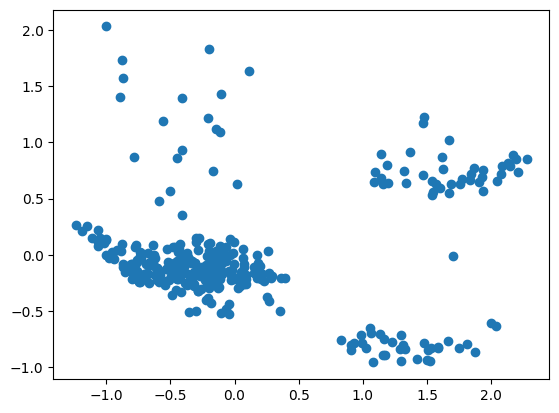

In [1410]:
import numpy as np
import matplotlib.pyplot as plt

residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

In [1411]:
# Creación de un segundo modelo al que se le aplicarán cambios diferentes al original

df_second = df.copy()

df_second['age2'] = df_second.age**2
df_second['overweight'] = (df_second.bmi > 30).astype(int)
df_second['overweight*smoker_yes'] = df_second.overweight * (df_second.smoker == 1)


In [1412]:
df_second.head()

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest,age2,overweight,overweight*smoker_yes
0,19,27.900,0,1,16884.92400,0,0,0,1,361,0,0
1,18,33.770,1,0,1725.55230,1,0,1,0,324,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0,784,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0,1089,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0,1024,0,0


In [1413]:
# Creación Segundo Modelo, Tomamos (p value < 0.05)


# X_cols = list(set(df_second.columns) - set(['charges']))
X_cols = ['smoker', 'overweight*smoker_yes', 'age2', 'children']
y_cols = ['charges']

X = df_second[X_cols].values
y = df_second[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc_x = StandardScaler()
sc_y = StandardScaler()

sc_x = sc_x.fit(X)
sc_y = sc_y.fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)


y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [1414]:
from regressors import stats

# model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)
print('Resultados:')
stats.summary(model, X_test, y_test, X_cols)

Resultados:
Residuals:
    Min     1Q  Median     3Q    Max
-1.9104 0.0661  0.1071 0.1386 0.3988


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept             0.000000    0.019215   0.0000  1.000000
smoker                 0.467337    0.023661  19.7511  0.000000
overweight*smoker_yes  0.481814    0.022687  21.2376  0.000000
age2                   0.328115    0.019414  16.9007  0.000000
children               0.078085    0.019647   3.9744  0.000087
---
R-squared:  0.88694,    Adjusted R-squared:  0.88557
F-statistic: 643.31 on 4 features


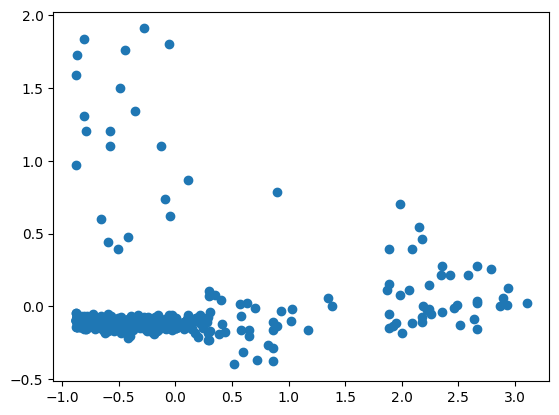

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show() #Se visualiza una mejora en los valores mayores de y_pred (eje X)